# Black Body Spectral Radiance: Planck vs. R.-J.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.constants as sc
from rftools import blackbody

# SciencePlots (optional)
plt.style.use(['science', 'notebook'])

In [2]:
# Temperatures
t1 = 15 * sc.milli
t2 = 1
t3 = 4
t4 = 50
t5 = 300

In [3]:
# Frequency
f = np.logspace(6, 16, 301)

### Planck distribution

$$B_\nu(\nu, T) = \dfrac{2h\nu^3}{c^2} \dfrac{1}{e^{h\nu/k_BT} - 1}$$

In [4]:
# Planck distribution
b1_planck = blackbody(f, t1, model='planck', variable_type='frequency')
b2_planck = blackbody(f, t2, model='planck', variable_type='frequency')
b3_planck = blackbody(f, t3, model='planck', variable_type='frequency')
b4_planck = blackbody(f, t4, model='planck', variable_type='frequency')
b5_planck = blackbody(f, t5, model='planck', variable_type='frequency')

/Users/johngarrett/GoogleDrive/Projects/RF-tools/rftools/thermal.py:26: RuntimeWarning: overflow encountered in exp
  term2 = np.exp(sc.h * variable / (sc.k * temp)) - 1


### Rayleigh-Jeans law

$$B_\nu(\nu,T) = \dfrac{2\nu^2k_BT}{c^2}$$

In [5]:
# Rayleigh-Jeans
b1_rj = blackbody(f, t1, model='rj', variable_type='frequency')
b2_rj = blackbody(f, t2, model='rj', variable_type='frequency')
b3_rj = blackbody(f, t3, model='rj', variable_type='frequency')
b4_rj = blackbody(f, t4, model='rj', variable_type='frequency')
b5_rj = blackbody(f, t5, model='rj', variable_type='frequency')

### Plot

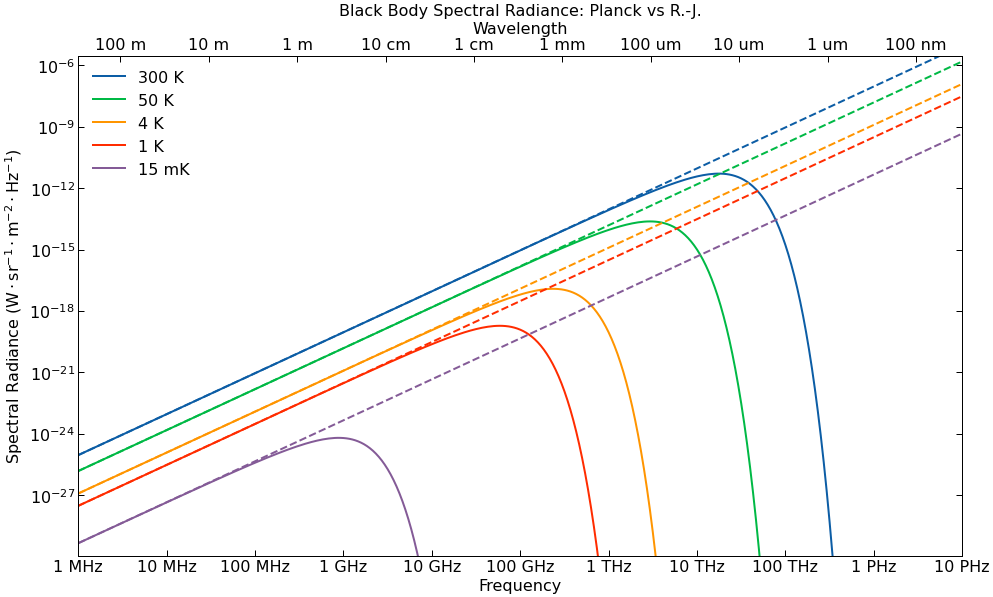

In [6]:
fig, ax = plt.subplots(figsize=(14, 8.5))
ax_top = ax.twiny()

ln, = ax.loglog(f, b5_planck, label=f"{t5:.0f} K")
ax.loglog(f, b5_rj, c=ln.get_color(), ls='--')

ln, = ax.loglog(f, b4_planck, label=f"{t4:.0f} K")
ax.loglog(f, b4_rj, c=ln.get_color(), ls='--')

ln, = ax.loglog(f, b3_planck, label=f"{t3:.0f} K")
ax.loglog(f, b3_rj, c=ln.get_color(), ls='--')

ln, = ax.loglog(f, b2_planck, label=f"{t2:.0f} K")
ax.loglog(f, b2_rj, c=ln.get_color(), ls='--')

ln, = ax.loglog(f, b1_planck, label=f"{t1*1e3:.0f} mK")
ax.loglog(f, b1_rj, c=ln.get_color(), ls='--')

ax.set_xlabel('Frequency')
ax.set_ylabel(r"Spectral Radiance ($\mathrm{W}\cdot\mathrm{sr}^{−1}\cdot\mathrm{m}^{−2}\cdot\mathrm{Hz}^{−1}$)")
ax.set_ylim([1.1e-30, 3e-6])
ax.set_xlim([f.min(), f.max()])
ax.set_xticks([1e6, 1e7, 1e8, 1e9, 1e10, 1e11, 1e12, 1e13, 1e14, 1e15, 1e16])
ax.set_xticklabels(['1 MHz', '10 MHz', '100 MHz', '1 GHz', '10 GHz', '100 GHz', '1 THz', '10 THz', '100 THz', '1 PHz', '10 PHz'])

ax_top.set_xlim([sc.c/(f.min()), sc.c/(f.max())])
ax_top.set_xscale("log", nonposx='clip')
ax_top.set_xlabel('Wavelength')
ax_top.set_xticks([1e2, 1e1, 1e0, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7])
ax_top.set_xticklabels(['100 m', '10 m', '1 m', '10 cm', '1 cm', '1 mm', '100 um', '10 um', '1 um', '100 nm'])

plt.title("Black Body Spectral Radiance: Planck vs R.-J.")
ax.legend()
plt.tight_layout()

plt.savefig("figures/blackbody-planck-vs-rj.png");